In [24]:
import pandas as pd
import seaborn as sn

In [25]:
df = pd.read_csv('../text-analysis-simplification.csv')

In [26]:
mean_columns = ['sentence_length','Kincaid', 'ARI',	'Coleman-Liau',	'FleschReadingEase', 'GunningFogIndex', 'LIX',	'DaleChallIndex']
sum_columns = ['tobeverb',	'auxverb',	'conjunction',	'pronoun',	'preposition',	'nominalization',	'interrogative',	'article',	'subordination']

In [27]:
df.head()

,sentence,source,title,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,...,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination
0,Controle op gebruik algoritmische surveillance...,AbstractiveSummEP,AISurveillance,8,12.425714,16.385714,22.811356,18.444286,14.228571,64.142857,...,19.773700,0,0,0,0,0,0,0,0,0
1,Exploratie door lens relationele ethiek.,AbstractiveSummEP,AISurveillance,6,12.320000,14.040000,19.440697,15.640000,10.000000,45.000000,...,16.516500,0,0,0,0,0,1,0,0,0
2,Technologische ontwikkelingen sinds einde 20st...,AbstractiveSummEP,AISurveillance,15,19.370000,19.549286,24.504744,-18.875000,17.028571,49.714286,...,20.120900,0,0,0,0,0,0,0,0,0
3,Big data en AI in 21ste eeuw interessant voor ...,AbstractiveSummEP,AISurveillance,11,6.010000,4.294000,7.111812,69.785000,12.000000,30.000000,...,16.764500,0,0,0,0,0,1,0,0,0
4,Gebruik technologie door politie als algoritmi...,AbstractiveSummEP,AISurveillance,8,17.482857,20.422857,27.851228,-17.812857,25.657143,78.428571,...,17.517986,0,0,0,0,0,1,0,0,0


In [28]:
sentence_info = df[['source', 'sentence_length', 'Kincaid','FleschReadingEase','SMOGIndex']]

grouped_mean = sentence_info.groupby(['source']).mean()
grouped_size = sentence_info.groupby(['source']).size()

result = grouped_mean.join(grouped_size.to_frame(name='size'))

In [29]:
result

,sentence_length,Kincaid,FleschReadingEase,SMOGIndex,size
source,,,,,
AbstractiveSumm,16.174883,12.221715,32.984991,12.588260,852
AbstractiveSummEP,17.664327,12.409531,34.179842,13.053917,855
ChatGPT,24.876712,14.931366,25.830237,15.553883,73
ExtractiveSum,26.800000,14.892908,29.706759,15.354187,165
GPT3Custom,21.480769,14.009315,26.545786,14.310293,52
GPT3CustomLS,21.290323,13.799669,27.841118,13.332015,31
HybridSum,16.151515,13.084963,26.919553,13.052353,165
HybridSumEP,18.918660,12.884487,33.162145,13.907094,209
ManualS1,16.772727,11.561900,38.886208,13.037439,22


In [30]:
sentence_info = df[['source','tobeverb','auxverb','conjunction','pronoun','preposition', 'nominalization', 'interrogative','article','subordination']]

grouped_sum = sentence_info.groupby(['source']).sum()
grouped_size = sentence_info.groupby(['source']).size()

result = grouped_sum.join(grouped_size.to_frame(name='size'))

for i in sentence_info.columns[1:]:
    result[i] = result[i] / result['size']

* Kincaid: This metric measures the US grade level required to understand the text.
* ARI: This metric also measures the US grade level required to understand the text.
* Coleman-Liau: This metric measures the US grade level required to understand the text.
* Flesch Reading Ease: This metric measures how easy or difficult a text is to read. The higher the score, the easier it is to read.
* Gunning Fog Index: This metric measures the years of formal education required to understand the text.
* LIX: This metric measures the complexity of a text by dividing the number of words by the number of sentences and adding the number of long words (more than six letters) per 100 words.
* SMOG Index: This metric measures the years of education required to understand the text.
* RIX: This metric measures how complex a text is by dividing long sentences (more than 10 words) by short sentences (less than 10 words).
* Dale-Chall Index: This metric measures how easy or difficult a text is to read. The higher the score, the more difficult it is to read.

In [31]:
df.groupby(['title']).mean()

C:\Users\dylan\AppData\Local\Temp\ipykernel_26112\2399029387.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['title']).mean()


,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination
title,,,,,,,,,,,,,,,,,,,
AISurveillance,20.242485,14.122075,16.678028,18.263310,25.895777,17.345847,55.256105,13.948845,6.613226,19.039737,0.334669,0.819639,0.002004,0.074148,0.100200,0.593186,0.020040,0.210421,0.052104
BelgieVsNederland,16.706320,12.406001,14.610968,17.456486,31.804841,15.620757,50.866094,12.354784,5.016729,18.809295,0.282528,0.288104,0.003717,0.046468,0.133829,0.470260,0.005576,0.187732,0.011152
Pensioenhervorming,17.797448,12.858793,14.820750,17.198793,30.997122,16.827264,52.315776,13.437884,5.606061,19.116024,0.245614,0.417863,0.000000,0.124402,0.122807,0.620415,0.006380,0.242424,0.043062
TheImpactofAIOnJobsAndSexualDiscrimination,21.720588,14.146018,16.087920,17.173484,27.727017,17.542690,55.389590,14.266472,6.890756,17.937791,0.647059,0.974790,0.016807,0.105042,0.098739,0.741597,0.008403,0.176471,0.153361
VirtualRealityStotterTherapie,17.059353,10.680433,12.817992,14.980695,45.289167,15.415216,49.574082,12.633166,5.055755,18.784231,0.330935,0.672662,0.003597,0.061151,0.185252,0.503597,0.039568,0.170863,0.039568


Hypothese 1:

de leesgraad van automatisch vereenvoudigde wetenschappelijke artikelen hebben een significant eenvoudigere leesgraad vergeleken met de oorspronkelijke wetenschappelijke artikelen

Hypothese 2:

de leesgraad van automatisch vereenvoudigde wetenschappelijke artikelen zijn minstens even eenvoudig dan handmatig vereenvoudigde artikelen

Hypothese 3:

de gebruikte syntactische structuren in een automatisch vereenvoudigd wetenschappelijk artikel zijn minstens even eenvoudig als het aantal in een handmatig vereenvoudigd wetenschappelijk artikel

Hypothese 4:

iets met samenvatting

Hypothese 5:

iets met het prototype

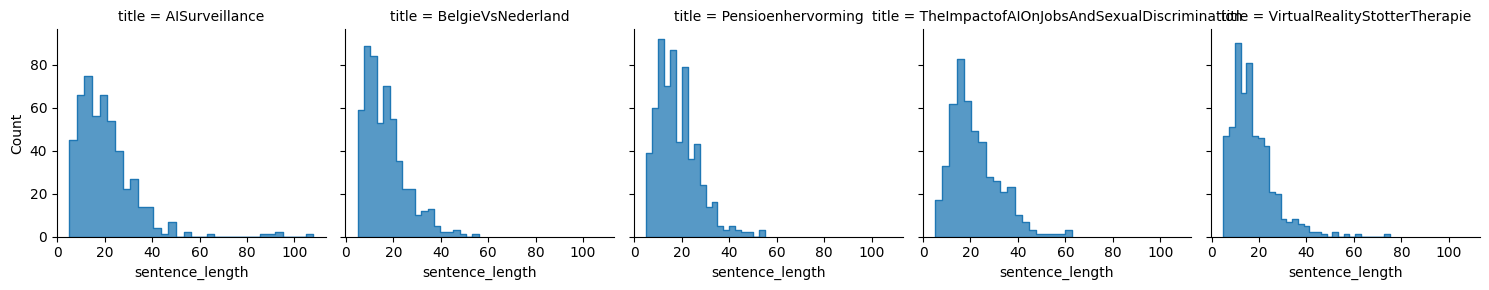

In [32]:
g = sn.FacetGrid(df, col='title')
g.map(sn.histplot, 'sentence_length', element="step")

<AxesSubplot: xlabel='sentence_length', ylabel='Count'>

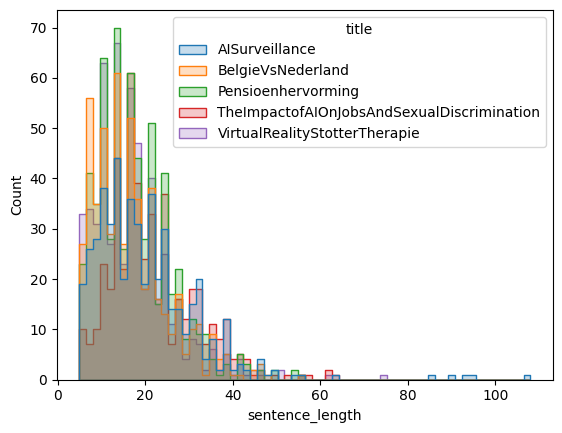

In [33]:
sn.histplot(data=df, x='sentence_length', hue='title', element="step")

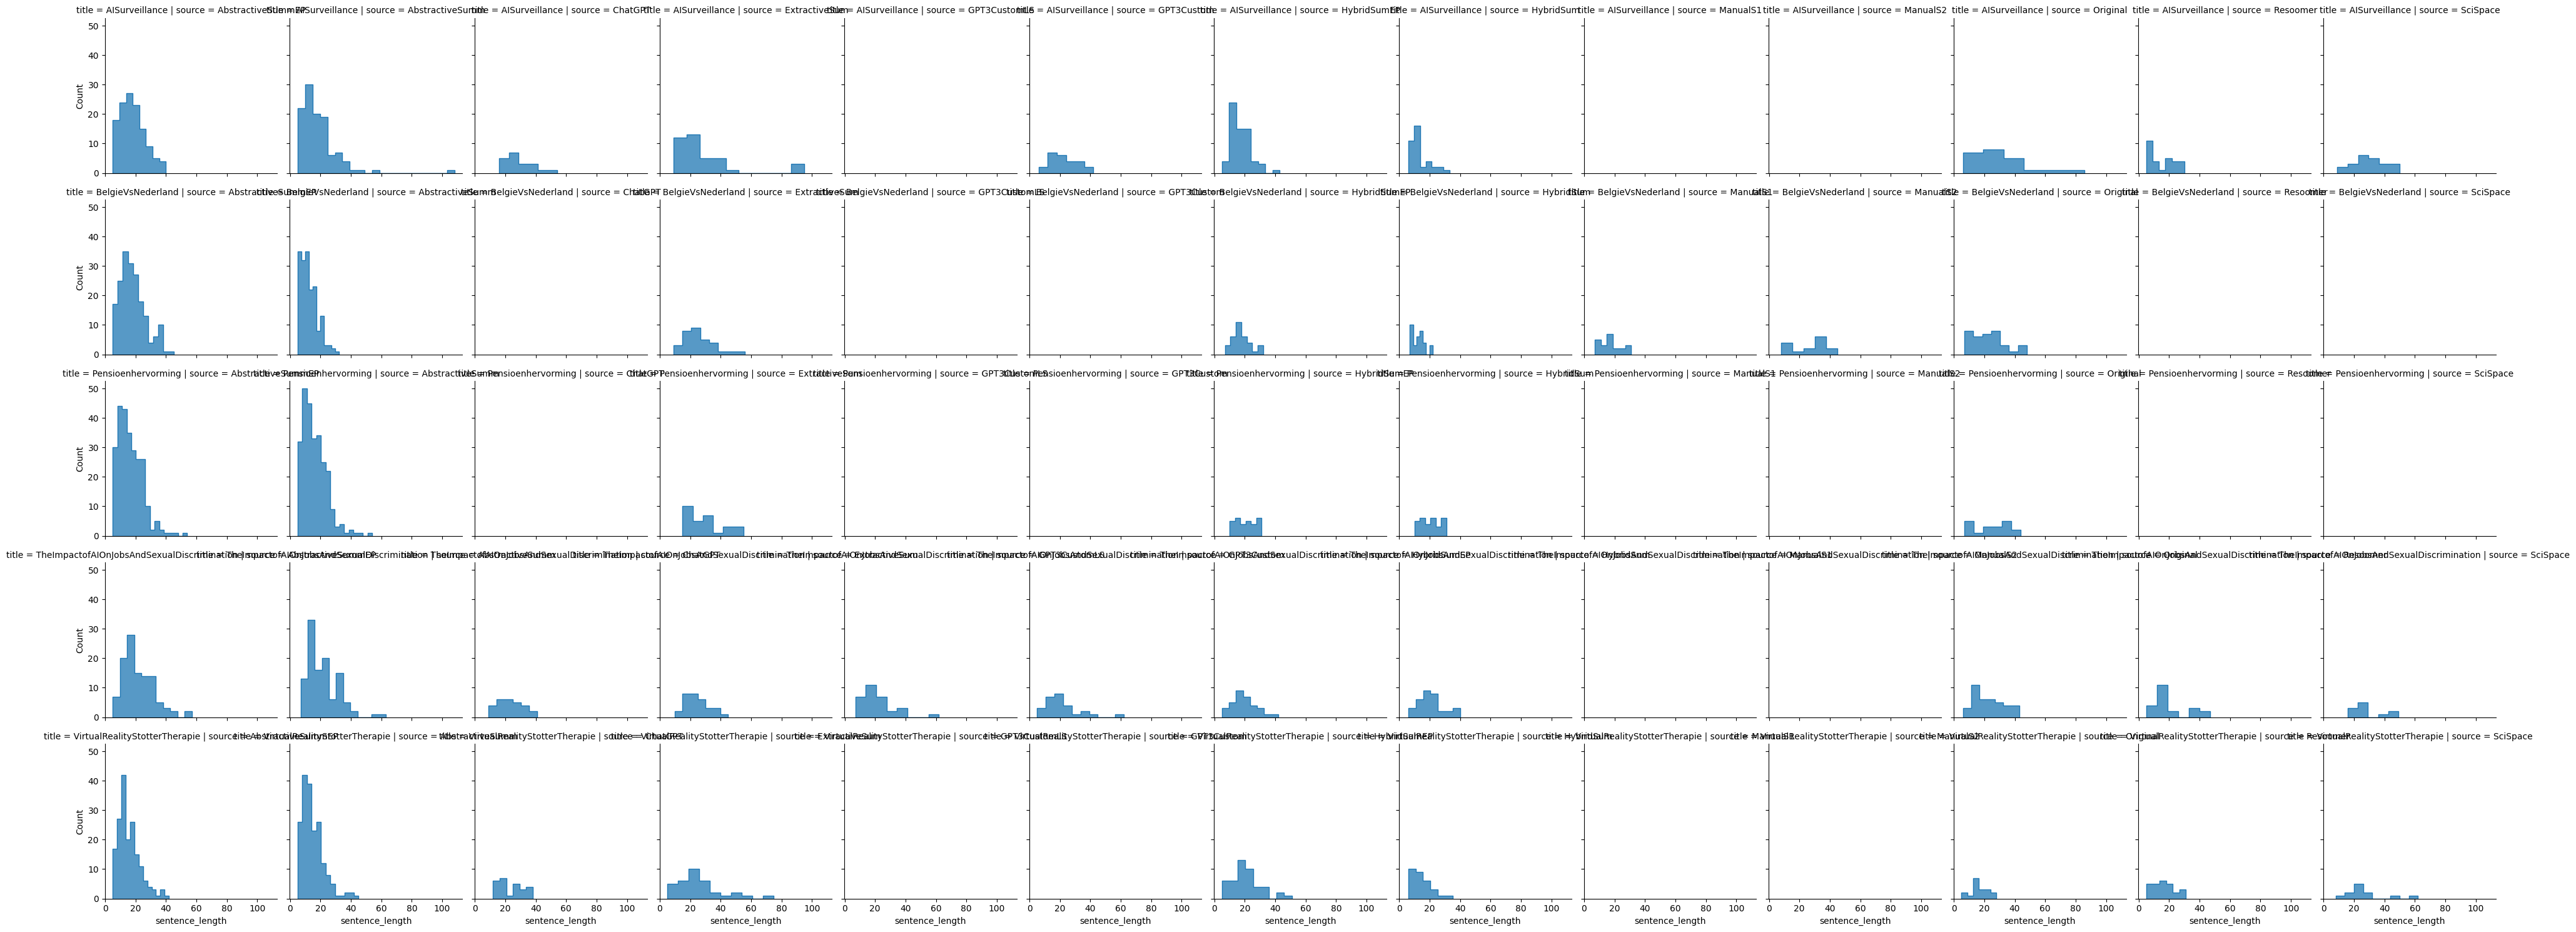

In [34]:
g = sn.FacetGrid(df, col='source', row='title')
g.map(sn.histplot, 'sentence_length', element="step")

<AxesSubplot: xlabel='sentence_length', ylabel='Count'>

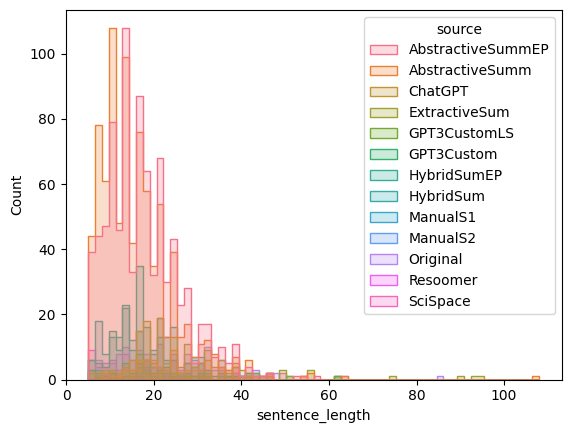

In [35]:
sn.histplot(data=df, x='sentence_length', hue='source', element="step")